In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [37]:
df = pd.read_csv('DataSet.csv')
df.head(-5)

,Month,Coarse wool Price,Cotton Price,Fine wool Price
0,Jan-07,715.51,483.75,893.66
1,Feb-07,706.96,503.00,875.62
2,Mar-07,724.75,509.00,914.02
3,Apr-07,742.55,552.50,940.37
4,May-07,788.25,592.00,989.08
...,...,...,...,...
116,Sep-16,1061.80,1025.00,1147.40
117,Oct-16,1023.64,963.75,1188.10
118,Nov-16,1019.21,1021.00,1189.28
119,Dec-16,1002.56,1127.00,1196.96


In [38]:
x=pd.get_dummies(df.Month)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              126 non-null    object 
 1   Coarse wool Price  126 non-null    float64
 2   Cotton Price       126 non-null    float64
 3   Fine wool Price    126 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.1+ KB


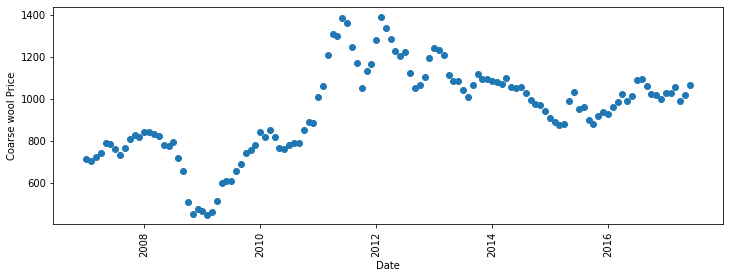

In [80]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
plt.scatter(x=df.Month,y=df['Coarse wool Price'],)
plt.xlabel('Date')
plt.ylabel('Coarse wool Price')
plt.show()

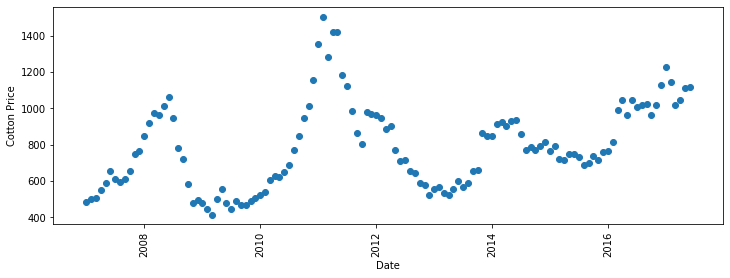

In [78]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
plt.scatter(x=df.Month,y=df['Cotton Price'])
plt.xlabel('Date')
plt.ylabel('Cotton Price')
plt.show()

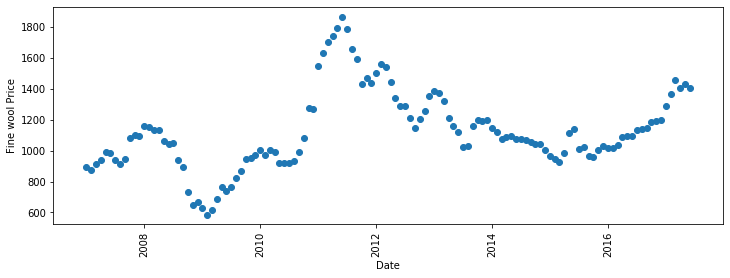

In [79]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
plt.scatter(x=df.Month,y=df['Fine wool Price'],)
plt.xlabel('Date')
plt.ylabel('Fine wool Price')
plt.show()

In [43]:
coarse = df['Coarse wool Price']
fine = df['Fine wool Price']
cotton = df['Cotton Price'] 

In [46]:
df['Month'] = pd.to_datetime(df['Month'],format='%b-%y')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              126 non-null    datetime64[ns]
 1   Coarse wool Price  126 non-null    float64       
 2   Cotton Price       126 non-null    float64       
 3   Fine wool Price    126 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.1 KB


In [50]:
df.head()

,Month,Coarse wool Price,Cotton Price,Fine wool Price
0,2007-01-01,715.51,483.75,893.66
1,2007-02-01,706.96,503.00,875.62
2,2007-03-01,724.75,509.00,914.02
3,2007-04-01,742.55,552.50,940.37
4,2007-05-01,788.25,592.00,989.08


In [54]:
coarse_df = pd.DataFrame()
coarse_df['ds'] = pd.to_datetime(df['Month'])
coarse_df['y'] = coarse
coarse_df.head()

,ds,y
0,2007-01-01,715.51
1,2007-02-01,706.96
2,2007-03-01,724.75
3,2007-04-01,742.55
4,2007-05-01,788.25


In [52]:
fine_df = pd.DataFrame()
fine_df['ds'] = pd.to_datetime(df['Month'])
fine_df['y'] = fine
fine_df.head()

In [55]:
cotton_df = pd.DataFrame()
cotton_df['ds'] = pd.to_datetime(df['Month'])
cotton_df['y'] = cotton
cotton_df.head()

,ds,y
0,2007-01-01,483.75
1,2007-02-01,503.00
2,2007-03-01,509.00
3,2007-04-01,552.50
4,2007-05-01,592.00


In [57]:
coarse_model = Prophet()
coarse_model.fit(coarse_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
fine_model = Prophet()
fine_model.fit(fine_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
cotton_model = Prophet()
cotton_model.fit(cotton_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future = fine_model.make_future_dataframe(periods=36, freq='m')
future.tail(10)

,ds
152,2019-08-31
153,2019-09-30
154,2019-10-31
155,2019-11-30
156,2019-12-31
157,2020-01-31
158,2020-02-29
159,2020-03-31
160,2020-04-30
161,2020-05-31


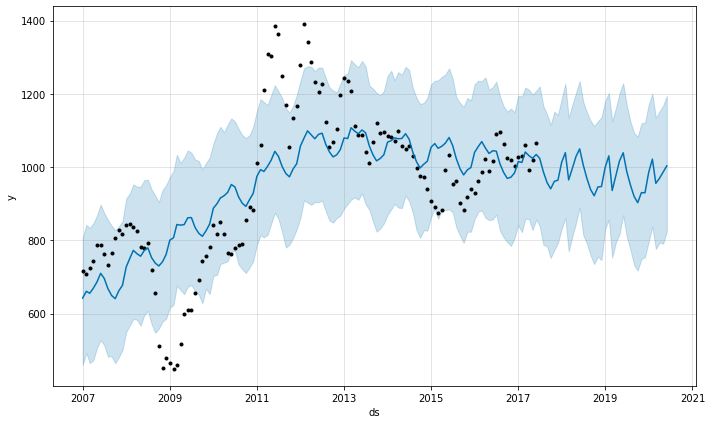

In [68]:
coarse_forecast = coarse_model.predict(future)
coarse_fig = coarse_model.plot(coarse_forecast)

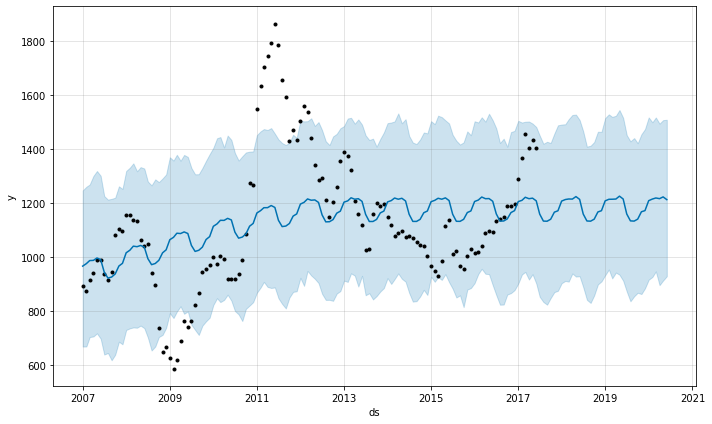

In [65]:
fine_forecast = fine_model.predict(future)
fine_fig = fine_model.plot(fine_forecast)

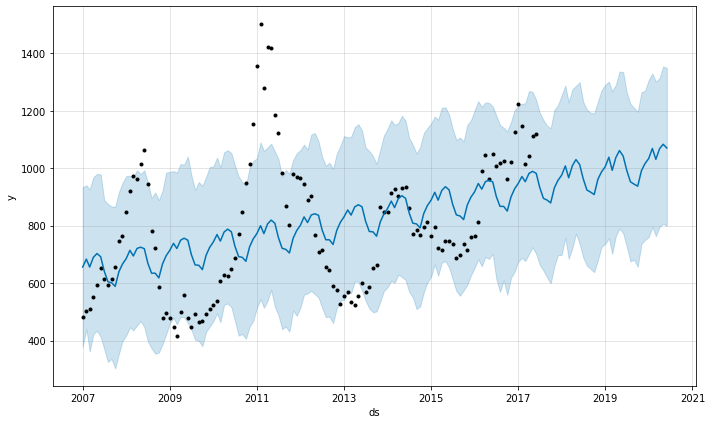

In [66]:
cotton_forecast = cotton_model.predict(future)
cotton_fig = cotton_model.plot(cotton_forecast)

In [77]:
print('The price of Coarse wool at the beginning of june-2020 will be 1003.31 $')
print('The price of Fine wool at the beginning of june-2020 will be 1212.75 $')
print('The price of Cotton at the beginning of june-2020 will be 1070.37 $')

The price of Coarse wool at the beginning of june-2020 will be 1003.31 $
The price of Fine wool at the beginning of june-2020 will be 1212.75 $
The price of Cotton at the beginning of june-2020 will be 1070.37 $
